In [1]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


### This notebook has 3 parts. 
---Italy
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data
    2.3 Daily ratios 2020
    2.4 Daily ratios 2019

### 3. Part three -  X and Y
    3.1 Earthmover and Jensenshanon [weekly and yearly normalization]
    3.2 Outlier detection and removal
    3.3 Moving average 
    3.4 Testing with other measures of difference
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap


### 4. Results
    4.1 Metrics/Correlation comparisons 

    





# Part one

### 1.1 Reading in the policy data of countries

In [2]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [3]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
7,AUS,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
8,AUT,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,AZE,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


In [4]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [5]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, Hungary, italy, Poland and Sweden

In [6]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [7]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
#inspect deutch dataframe
deutch_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  Italy

In [9]:

#extract the Italy policy column 
#Transpose so that we get the total sum as a column at the end 

italy_policy_transposed =italy_policy.T 
italy_policy_transposed.reset_index(inplace=True)

italy_policy_transposed = italy_policy_transposed.drop(labels=0, axis=0)
italy_policy_transposed.rename(columns=italy_policy_transposed.iloc[0])
italy_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Italy,Italy,Italy,Italy,Italy,Italy,Italy,Italy,ItalyItalyItalyItalyItalyItalyItalyItaly
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [10]:
#drop the first row
italy_policy_transposed=italy_policy_transposed.iloc[1:,:]
italy_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [11]:
print(italy_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  3  3  2  4  0  2  2  3        19
63  02Mar2020  3  3  2  4  0  2  2  3        19
64  03Mar2020  3  3  2  4  0  2  2  3        19
65  04Mar2020  3  3  2  4  0  2  2  3        19
66  05Mar2020  3  3  2  4  0  2  2  3        19


In [12]:
italy_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          556 non-null    object
 2   1          556 non-null    object
 3   2          556 non-null    object
 4   3          556 non-null    object
 5   4          556 non-null    object
 6   5          556 non-null    object
 7   6          556 non-null    object
 8   7          556 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [13]:
italy_policy_transposed.iloc[:,1] = italy_policy_transposed.iloc[:,1].astype(str).astype(float)
italy_policy_transposed.iloc[:,2] = italy_policy_transposed.iloc[:,2].astype(str).astype(float)
italy_policy_transposed.iloc[:,3] = italy_policy_transposed.iloc[:,3].astype(str).astype(float)
italy_policy_transposed.iloc[:,4] = italy_policy_transposed.iloc[:,4].astype(str).astype(float)
italy_policy_transposed.iloc[:,5] = italy_policy_transposed.iloc[:,5].astype(str).astype(float)
italy_policy_transposed.iloc[:,6] = italy_policy_transposed.iloc[:,6].astype(str).astype(float)
italy_policy_transposed.iloc[:,7] = italy_policy_transposed.iloc[:,7].astype(str).astype(float)
italy_policy_transposed.iloc[:,8] = italy_policy_transposed.iloc[:,8].astype(str).astype(float)
italy_policy_transposed.iloc[:,9] = italy_policy_transposed.iloc[:,9].astype(str).astype(float)

italy_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          556 non-null    float64
 2   1          556 non-null    float64
 3   2          556 non-null    float64
 4   3          556 non-null    float64
 5   4          556 non-null    float64
 6   5          556 non-null    float64
 7   6          556 non-null    float64
 8   7          556 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [14]:
# rename the "index column" to "Date" and change it from string to datetime

italy_policy_transposed.columns
#italy_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

italy_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


italy_policy_transposed['Date']=pd.to_datetime(italy_policy_transposed['Date'])

italy_policy_transposed.head()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Independent variable for Italy = weekely policy average

In [15]:

#extract the week number (of the year) and add it as a new column at the end

italy_policy_transposed['week_of_year']= italy_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
italy_policy_transposed.head(10)

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [16]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

italy_policy_transposed_FirstLastWeekDropped=italy_policy_transposed.loc[( (italy_policy_transposed['Date'] < '2021-01-01 00:00:00') & (italy_policy_transposed['week_of_year']< 52) & (1<italy_policy_transposed['week_of_year']))]

#head
italy_policy_transposed_FirstLastWeekDropped.head()


,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [17]:
#tail
italy_policy_transposed_FirstLastWeekDropped.tail()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
352,2020-12-16,2.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,19.0,51
353,2020-12-17,2.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,19.0,51
354,2020-12-18,2.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,19.0,51
355,2020-12-19,2.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,19.0,51
356,2020-12-20,2.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,19.0,51


##  1.5 Statistics of policies for Italy

In [18]:
italy_policy_transposed_FirstLastWeekDropped.describe()

,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2.265714,1.971429,1.725714,2.437143,0.385714,1.042857,0.925714,2.774286,13.528571,26.500000
std,1.070962,0.983698,0.688981,1.542258,0.603069,0.969975,0.998665,0.712493,5.944156,14.451529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,11.000000,14.000000
50%,3.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.000000,13.000000,26.500000
75%,3.000000,3.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,19.000000,39.000000
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,3.000000,21.000000,51.000000


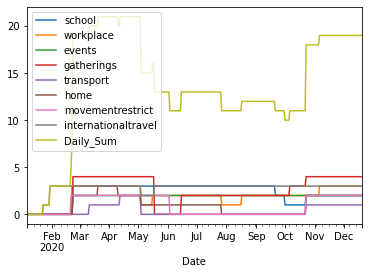

In [19]:
italy_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

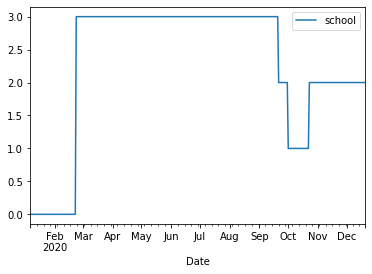

In [20]:
df1 = italy_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations Italy


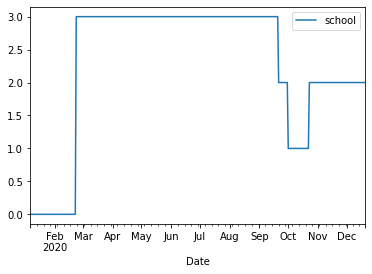

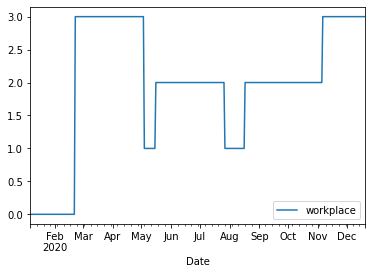

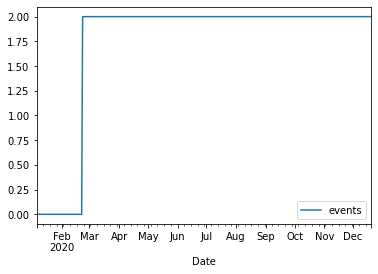

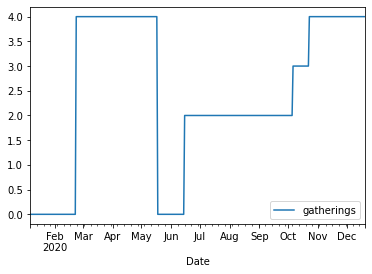

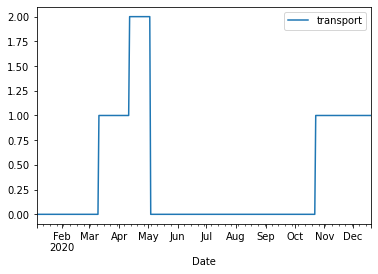

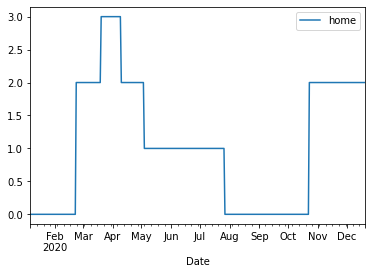

In [21]:
df1 = italy_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = italy_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = italy_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = italy_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = italy_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = italy_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = italy_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = italy_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations Italy")       
plt.show()

In [22]:
#italy_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [23]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_italy=italy_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_italy.iloc[47:70,:])

    Daily_Sum  week_of_year
54        8.0             8
55       19.0             8
56       19.0             9
57       19.0             9
58       19.0             9
59       19.0             9
60       19.0             9
61       19.0             9
62       19.0             9
63       19.0            10
64       19.0            10
65       19.0            10
66       19.0            10
67       19.0            10
68       19.0            10
69       19.0            10
70       19.0            11
71       19.0            11
72       20.0            11
73       20.0            11
74       20.0            11
75       20.0            11
76       20.0            11


In [24]:
# 7 days 50 weeks = 350 data points
policy_2020_total_italy.shape

(350, 2)

## Group the daily sum by week

In [25]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_italy=policy_2020_total_italy.groupby(['week_of_year']).sum()
weekly_policy_2020_italy.columns=["Weekly_sum"] 

In [26]:
weekly_policy_2020_italy.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,4.0
5,15.0
6,21.0
7,21.0
8,44.0
9,133.0
10,133.0


In [27]:
print(weekly_policy_2020_italy.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    4.0
5                   15.0
6                   21.0
7                   21.0
8                   44.0
9                  133.0
10                 133.0
11                 138.0
12                 143.0
13                 147.0
14                 147.0
15                 145.0
16                 147.0
17                 147.0
18                 147.0
19                 105.0


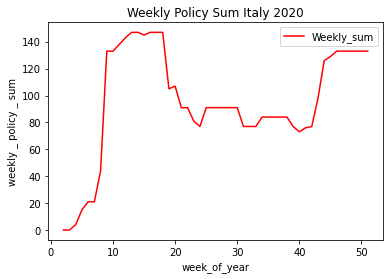

In [28]:
ax = plt.gca()
weekly_policy_2020_italy.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum Italy 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [29]:
#average weekly independent variable 
weekly_ratio_policy_2020_italy=weekly_policy_2020_italy/7
weekly_ratio_policy_2020_italy.head(10)

,Weekly_sum
week_of_year,
2,0.000000
3,0.000000
4,0.571429
5,2.142857
6,3.000000
7,3.000000
8,6.285714
9,19.000000
10,19.000000


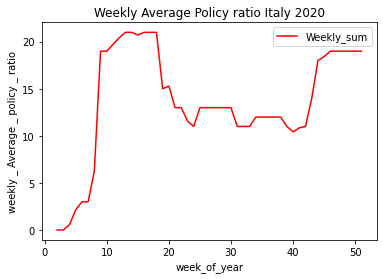

In [30]:
ax = plt.gca()
weekly_ratio_policy_2020_italy.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy ratio Italy 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [31]:
#the final independent variable in list form 
weekly_ratio_policy_2020_italy=weekly_ratio_policy_2020_italy['Weekly_sum'].tolist()
print(weekly_ratio_policy_2020_italy[:14])

[0.0, 0.0, 0.5714285714285714, 2.142857142857143, 3.0, 3.0, 6.285714285714286, 19.0, 19.0, 19.714285714285715, 20.428571428571427, 21.0, 21.0, 20.714285714285715]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [32]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_italy=italy_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_italy.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
78     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
79     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
80     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
81     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
82     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
83     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
84     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
85     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
86     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
87     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
88     3.0        3.0     2.0         4.

### Let's  drop the transportation as its change is small 

In [33]:
#extract only the two columns of daily_sum and week_of year

#policy_2020_indicators_italy.drop('transport', inplace=True, axis=1)
print(policy_2020_indicators_italy.iloc[70:90,:])


    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
78     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
79     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
80     3.0        3.0     2.0         4.0        1.0   2.0               2.0   
81     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
82     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
83     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
84     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
85     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
86     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
87     3.0        3.0     2.0         4.0        1.0   3.0               2.0   
88     3.0        3.0     2.0         4.

In [34]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_italy_indicators=policy_2020_indicators_italy.groupby(['week_of_year']).sum()
weekly_policy_2020_italy_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             ,"weekly_transportation","weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_italy_indicators.iloc[45:50, :])


              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                     14.0              21.0           14.0   
48                     14.0              21.0           14.0   
49                     14.0              21.0           14.0   
50                     14.0              21.0           14.0   
51                     14.0              21.0           14.0   

              weekly_gatherings  weekly_transportation  weekly_home  \
week_of_year                                                          
47                         28.0                    7.0         14.0   
48                         28.0                    7.0         14.0   
49                         28.0                    7.0         14.0   
50                         28.0                    7.0         14.0   
51                         28.0                    7.0         14.0   

              weekly_movement  weekly_travel  weekly_

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [35]:
#average weekly independent variable 
weekly_policy_2020_italy_indicators_ratio=weekly_policy_2020_italy_indicators/7
weekly_policy_2020_italy_indicators_ratio.head(10)

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,,
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.571429
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.142857,2.142857
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
8,0.428571,0.857143,0.285714,0.571429,0.000000,0.285714,0.857143,3.000000,6.285714
9,3.000000,3.000000,2.000000,4.000000,0.000000,2.000000,2.000000,3.000000,19.000000
10,3.000000,3.000000,2.000000,4.000000,0.000000,2.000000,2.000000,3.000000,19.000000


# Part two

## 2.1  Reading in the editorship data


In [36]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [37]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [38]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [39]:
revs_italy.head()

,y,m,d,h,c
0,2018,1,1,0,621
1,2018,1,1,1,434
2,2018,1,1,2,151
3,2018,1,1,3,98
4,2018,1,1,4,53


In [40]:

#making up the datetime structure 
revs_italy['dateInt']=revs_italy['y'].astype(str) + revs_italy['m'].astype(str).str.zfill(2)+ revs_italy['d'].astype(str).str.zfill(2)
revs_italy['Date'] = pd.to_datetime(revs_italy['dateInt'], format='%Y%m%d')      
revs_italy = revs_italy.reset_index()
revs_italy.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,1,0,621,20180101,2018-01-01
1,1,2018,1,1,1,434,20180101,2018-01-01
2,2,2018,1,1,2,151,20180101,2018-01-01
3,3,2018,1,1,3,98,20180101,2018-01-01
4,4,2018,1,1,4,53,20180101,2018-01-01


In [41]:
print(revs_italy.iloc[50:55, :])

    index     y  m  d  h    c   dateInt       Date
50     50  2018  1  3  2  156  20180103 2018-01-03
51     51  2018  1  3  3  110  20180103 2018-01-03
52     52  2018  1  3  4   94  20180103 2018-01-03
53     53  2018  1  3  5   95  20180103 2018-01-03
54     54  2018  1  3  6  131  20180103 2018-01-03


In [42]:

#extract the week number and add it as a new column
revs_italy['week_of_year']= revs_italy['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_italy['hour_of_week']=revs_italy['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_italy['hour_of_week']=revs_italy['Date'].apply(lambda x: 24*x.weekday()) + revs_italy['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_italy.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,1,0,621,20180101,2018-01-01,1,0
1,1,2018,1,1,1,434,20180101,2018-01-01,1,1
2,2,2018,1,1,2,151,20180101,2018-01-01,1,2
3,3,2018,1,1,3,98,20180101,2018-01-01,1,3
4,4,2018,1,1,4,53,20180101,2018-01-01,1,4
5,5,2018,1,1,5,42,20180101,2018-01-01,1,5
6,6,2018,1,1,6,54,20180101,2018-01-01,1,6
7,7,2018,1,1,7,67,20180101,2018-01-01,1,7
8,8,2018,1,1,8,192,20180101,2018-01-01,1,8
9,9,2018,1,1,9,487,20180101,2018-01-01,1,9


### 2.2 Prepare editorship data Italy for 2020

In [43]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_italy_2020=revs_italy.loc[(revs_italy['Date'] >= '2020-01-01 00:00:00') & (revs_italy['Date'] < '2021-01-01 00:00:00')& (revs_italy['week_of_year'] < 52)& (1<revs_italy['week_of_year'])]
revs_italy_2020.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17629,17629,2020,1,6,0,470,20200106,2020-01-06,2,0
17630,17630,2020,1,6,1,322,20200106,2020-01-06,2,1
17631,17631,2020,1,6,2,272,20200106,2020-01-06,2,2
17632,17632,2020,1,6,3,401,20200106,2020-01-06,2,3
17633,17633,2020,1,6,4,149,20200106,2020-01-06,2,4
17634,17634,2020,1,6,5,263,20200106,2020-01-06,2,5
17635,17635,2020,1,6,6,192,20200106,2020-01-06,2,6
17636,17636,2020,1,6,7,240,20200106,2020-01-06,2,7
17637,17637,2020,1,6,8,459,20200106,2020-01-06,2,8
17638,17638,2020,1,6,9,628,20200106,2020-01-06,2,9


In [44]:
#tail
revs_italy_2020.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
26024,26024,2020,12,20,19,906,20201220,2020-12-20,51,163
26025,26025,2020,12,20,20,1261,20201220,2020-12-20,51,164
26026,26026,2020,12,20,21,1283,20201220,2020-12-20,51,165
26027,26027,2020,12,20,22,670,20201220,2020-12-20,51,166
26028,26028,2020,12,20,23,626,20201220,2020-12-20,51,167


In [45]:

#group by 'week_of_year', 'hour_of_week' 

grouped_italy_2020=revs_italy_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_italy_2020 = grouped_italy_2020.reset_index()
grouped_italy_2020.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,17629,2020,1,6,0,470
1,2,1,17630,2020,1,6,1,322
2,2,2,17631,2020,1,6,2,272
3,2,3,17632,2020,1,6,3,401
4,2,4,17633,2020,1,6,4,149
5,2,5,17634,2020,1,6,5,263
6,2,6,17635,2020,1,6,6,192
7,2,7,17636,2020,1,6,7,240
8,2,8,17637,2020,1,6,8,459
9,2,9,17638,2020,1,6,9,628


In [46]:
#tail
grouped_italy_2020.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8395,51,163,26024,2020,12,20,19,906
8396,51,164,26025,2020,12,20,20,1261
8397,51,165,26026,2020,12,20,21,1283
8398,51,166,26027,2020,12,20,22,670
8399,51,167,26028,2020,12,20,23,626


In [47]:

#populate the numpy array 

array_weekly_events_italy_2020 = np.zeros((52,168))


for  i in range (grouped_italy_2020.shape[0]):
    
    week=grouped_italy_2020.iloc[i]['week_of_year']
    hour=grouped_italy_2020.iloc[i]['hour_of_week']
    array_weekly_events_italy_2020[week][hour]= grouped_italy_2020.iloc[i]['c']



In [48]:
print(array_weekly_events_italy_2020)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 470.  322.  272. ...  704.  728.  613.]
 ...
 [ 350.  209.  150. ...  796.  688.  609.]
 [ 302.  186.  182. ...  677.  742.  554.]
 [ 336.  192.  152. ... 1283.  670.  626.]]


In [49]:
print(array_weekly_events_italy_2020[3][:])

[ 476.  289.  199.  415.  142.  364.  259.  403.  574.  981.  882.  685.
  903.  870.  839.  964. 1022.  953.  665.  589.  616.  611.  627. 1113.
  478.  272.  192.  290.  162.  266.  279. 1156.  547.  659.  659.  789.
  667.  895.  809.  917.  889. 2057. 1972. 2581. 1521. 2421.  593. 1206.
  377.  277.  182. 2650. 2202.  541.  251.  831. 2547. 2699. 2823. 2550.
 2690. 3120. 3030. 3135. 2417. 3156. 2956. 2775. 2781. 1162.  669.  910.
  316.  249.  169.  369.  128.  752.  224. 1308. 1071.  680.  842.  996.
  895.  933. 1126. 2874. 4431. 3838. 2620. 4518. 3935.  870.  763. 1251.
  807.  262.  228.  619.  138.  525.  234. 1254. 1137.  733.  695.  667.
  689.  929. 2313. 3388. 1359. 1346. 2628.  808. 1144. 1010.  737.  598.
  401.  215.  204.  522.  159.  226.  187. 1357. 3156. 3361. 2271. 3374.
 3303. 3092. 2894. 3364. 3375. 2410. 2963. 2769. 1085.  506.  457.  405.
  344.  277.  168.  653.  160.  742.  193.  314.  453. 2214. 3354. 2701.
  666.  752. 1143.  764.  730.  787.  844. 1147. 11

In [50]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_italy_2020=np.sum(array_weekly_events_italy_2020 , axis=1)
print(weekly_sum_italy_2020)

[     0.      0. 116667. 207724. 147466. 141108. 123097. 113813. 105687.
 134491. 110752. 119400. 143086. 128202. 138997. 117883. 137311. 169057.
 203368. 122552. 133243. 119112. 130719. 116800. 129536. 109537. 131660.
 146495.  99679.  91689. 102331.  91647.  92078. 117935. 102869. 136078.
 113424.  92663.  83669. 106156.  92127. 103137.  87517.  98981. 102825.
 115415. 123339. 119770. 105780. 104942.  97994. 112465.]


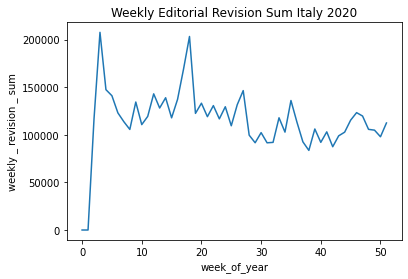

In [51]:
ax = plt.gca()

plt.plot(weekly_sum_italy_2020) 
plt.title('Weekly Editorial Revision Sum Italy 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [52]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_italy=np.sum(weekly_sum_italy_2020)
yearly_sum_2020_italy

5992273.0

### 2.3  168 daily ratios for 2020 Italy

In [53]:

array_weekly_ratios_italy_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_italy_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_italy_2020[i]=array_weekly_events_italy_2020[i+2]/weekly_sum_italy_2020[i+2]

print(array_weekly_ratios_italy_2020)

[[0.00402856 0.00275999 0.00233142 ... 0.00603427 0.00623998 0.00525427]
 [0.0022915  0.00139127 0.000958   ... 0.0039331  0.00359612 0.00337467]
 [0.00236665 0.00204793 0.00122062 ... 0.00636757 0.0059607  0.00445526]
 ...
 [0.00333518 0.00199158 0.00142936 ... 0.00758514 0.006556   0.00580321]
 [0.00308182 0.00189808 0.00185726 ... 0.00690859 0.00757189 0.00565341]
 [0.0029876  0.0017072  0.00135153 ... 0.01140799 0.00595741 0.00556618]]


In [54]:
print(array_weekly_ratios_italy_2020[1][:])

[0.0022915  0.00139127 0.000958   0.00199784 0.0006836  0.00175233
 0.00124685 0.00194007 0.00276328 0.00472261 0.00424602 0.00329764
 0.00434711 0.00418825 0.00403901 0.00464077 0.00491999 0.00458782
 0.00320136 0.00283549 0.00296547 0.0029414  0.00301843 0.00535807
 0.00230113 0.00130943 0.0009243  0.00139608 0.00077988 0.00128055
 0.00134313 0.00556508 0.0026333  0.00317248 0.00317248 0.00379831
 0.00321099 0.0043086  0.00389459 0.00441451 0.00427972 0.00990256
 0.00949337 0.01242514 0.00732222 0.01165489 0.00285475 0.00580578
 0.00181491 0.0013335  0.00087616 0.01275731 0.0106006  0.00260442
 0.00120833 0.0040005  0.01226146 0.0129932  0.01359015 0.0122759
 0.01294988 0.01501993 0.01458666 0.01509214 0.01163563 0.01519324
 0.01423042 0.01335907 0.01338796 0.00559396 0.00322062 0.00438081
 0.00152125 0.00119871 0.00081358 0.0017764  0.0006162  0.00362019
 0.00107835 0.00629682 0.00515588 0.00327357 0.00405346 0.00479482
 0.0043086  0.00449154 0.00542065 0.01383567 0.02133119 0.01847

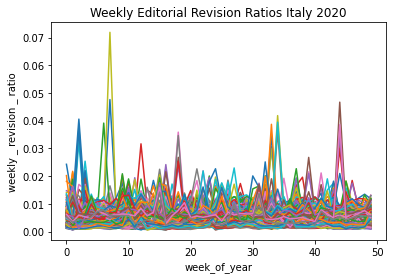

In [55]:
ax = plt.gca()

plt.plot(array_weekly_ratios_italy_2020) 
plt.title('Weekly Editorial Revision Ratios Italy 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data Italy for 2019

In [56]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_italy_2019=revs_italy.loc[(revs_italy['Date'] >= '2019-01-01 00:00:00') & (revs_italy['Date'] < '2020-01-01 00:00:00') & (revs_italy['week_of_year'] < 52)& (1<revs_italy['week_of_year'])]
revs_italy_2019.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
8902,8902,2019,1,7,0,738,20190107,2019-01-07,2,0
8903,8903,2019,1,7,1,314,20190107,2019-01-07,2,1
8904,8904,2019,1,7,2,211,20190107,2019-01-07,2,2
8905,8905,2019,1,7,3,124,20190107,2019-01-07,2,3
8906,8906,2019,1,7,4,135,20190107,2019-01-07,2,4
8907,8907,2019,1,7,5,146,20190107,2019-01-07,2,5
8908,8908,2019,1,7,6,204,20190107,2019-01-07,2,6
8909,8909,2019,1,7,7,279,20190107,2019-01-07,2,7
8910,8910,2019,1,7,8,485,20190107,2019-01-07,2,8
8911,8911,2019,1,7,9,637,20190107,2019-01-07,2,9


In [57]:
revs_italy_2019.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17288,17288,2019,12,22,19,628,20191222,2019-12-22,51,163
17289,17289,2019,12,22,20,673,20191222,2019-12-22,51,164
17290,17290,2019,12,22,21,911,20191222,2019-12-22,51,165
17291,17291,2019,12,22,22,701,20191222,2019-12-22,51,166
17292,17292,2019,12,22,23,526,20191222,2019-12-22,51,167


In [58]:

grouped_italy_2019=revs_italy_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_italy_2019 = grouped_italy_2019.reset_index()
grouped_italy_2019.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,8902,2019,1,7,0,738
1,2,1,8903,2019,1,7,1,314
2,2,2,8904,2019,1,7,2,211
3,2,3,8905,2019,1,7,3,124
4,2,4,8906,2019,1,7,4,135
5,2,5,8907,2019,1,7,5,146
6,2,6,8908,2019,1,7,6,204
7,2,7,8909,2019,1,7,7,279
8,2,8,8910,2019,1,7,8,485
9,2,9,8911,2019,1,7,9,637


In [59]:
grouped_italy_2019.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8386,51,163,17288,2019,12,22,19,628
8387,51,164,17289,2019,12,22,20,673
8388,51,165,17290,2019,12,22,21,911
8389,51,166,17291,2019,12,22,22,701
8390,51,167,17292,2019,12,22,23,526


In [60]:


array_weekly_events_italy_2019 = np.zeros((52,168))



for  i in range (grouped_italy_2019.shape[0]):
    
    week=grouped_italy_2019.iloc[i]['week_of_year']
    hour=grouped_italy_2019.iloc[i]['hour_of_week']
    array_weekly_events_italy_2019[week][hour]= grouped_italy_2019.iloc[i]['c']

print(array_weekly_events_italy_2019)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [738. 314. 211. ... 689. 575. 489.]
 ...
 [313. 214. 187. ... 564. 666. 570.]
 [316. 204. 158. ... 564. 888. 790.]
 [329. 249. 190. ... 911. 701. 526.]]


In [61]:
print(array_weekly_events_italy_2020[3][:])

[ 476.  289.  199.  415.  142.  364.  259.  403.  574.  981.  882.  685.
  903.  870.  839.  964. 1022.  953.  665.  589.  616.  611.  627. 1113.
  478.  272.  192.  290.  162.  266.  279. 1156.  547.  659.  659.  789.
  667.  895.  809.  917.  889. 2057. 1972. 2581. 1521. 2421.  593. 1206.
  377.  277.  182. 2650. 2202.  541.  251.  831. 2547. 2699. 2823. 2550.
 2690. 3120. 3030. 3135. 2417. 3156. 2956. 2775. 2781. 1162.  669.  910.
  316.  249.  169.  369.  128.  752.  224. 1308. 1071.  680.  842.  996.
  895.  933. 1126. 2874. 4431. 3838. 2620. 4518. 3935.  870.  763. 1251.
  807.  262.  228.  619.  138.  525.  234. 1254. 1137.  733.  695.  667.
  689.  929. 2313. 3388. 1359. 1346. 2628.  808. 1144. 1010.  737.  598.
  401.  215.  204.  522.  159.  226.  187. 1357. 3156. 3361. 2271. 3374.
 3303. 3092. 2894. 3364. 3375. 2410. 2963. 2769. 1085.  506.  457.  405.
  344.  277.  168.  653.  160.  742.  193.  314.  453. 2214. 3354. 2701.
  666.  752. 1143.  764.  730.  787.  844. 1147. 11

In [62]:
weekly_sum_italy_2019=np.sum(array_weekly_events_italy_2019 , axis=1)
print(weekly_sum_italy_2019)

[     0.      0. 109024. 108088. 120303. 113737.  98423. 113186. 119676.
  94240. 120989. 124096. 131025.  91387. 145090. 144030. 115293. 187484.
 270667. 120544. 114889. 105972. 194971. 170560. 137035. 220388. 196661.
 201475. 103732. 104137. 111277. 105312.  97324.  84601.  90272.  97616.
 100948. 100011.  91230. 112513.  93278.  97259.  99253.  94510. 102968.
 109561. 121489. 102911.  98392.  85624.  90308. 115297.]


In [63]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_italy=np.sum(weekly_sum_italy_2019)
yearly_sum_2019_italy

6079056.0

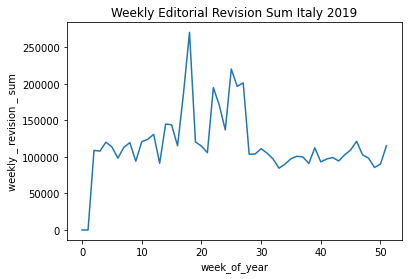

In [64]:
ax = plt.gca()

plt.plot(weekly_sum_italy_2019) 
plt.title('Weekly Editorial Revision Sum Italy 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

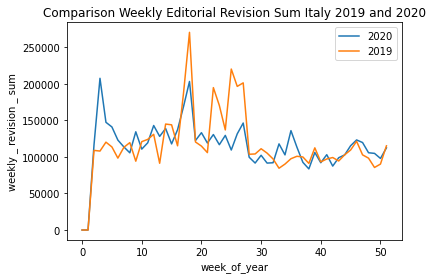

In [65]:

plt.plot(weekly_sum_italy_2020, label= '2020') 
plt.plot(weekly_sum_italy_2019, label= '2019') 

plt.title('Comparison Weekly Editorial Revision Sum Italy 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.legend()

plt.show()

### Normalize by weekly sums

In [66]:

array_weekly_ratios_italy_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_italy_2019[i]=array_weekly_events_italy_2019[i+2]/weekly_sum_italy_2019[i+2]

print(array_weekly_ratios_italy_2019)

[[0.00676915 0.0028801  0.00193535 ... 0.00631971 0.00527407 0.00448525]
 [0.00666124 0.00432055 0.00185034 ... 0.00929798 0.00904818 0.00492192]
 [0.00649194 0.00253527 0.0012801  ... 0.0059932  0.00502066 0.00433904]
 ...
 [0.00365552 0.0024993  0.00218397 ... 0.00658694 0.00777819 0.00665701]
 [0.00349914 0.00225894 0.00174957 ... 0.00624529 0.00983302 0.00874784]
 [0.0028535  0.00215964 0.00164792 ... 0.00790133 0.00607995 0.00456213]]


In [67]:
print(array_weekly_ratios_italy_2019[1][:])

[0.00666124 0.00432055 0.00185034 0.00168381 0.00128599 0.00098068
 0.00126749 0.00299756 0.00440382 0.00638369 0.00611539 0.00606913
 0.00502368 0.00557879 0.00817852 0.0083543  0.00884465 0.00820628
 0.0072441  0.00624491 0.00650396 0.00661498 0.00524573 0.00519022
 0.00614314 0.00277552 0.00271075 0.0013415  0.00091592 0.00089742
 0.00174858 0.00245171 0.00492192 0.01196248 0.00797498 0.00583784
 0.00557879 0.00768818 0.00770668 0.01139812 0.01025091 0.00764192
 0.00717008 0.00600437 0.00613389 0.00630967 0.00478314 0.00535675
 0.00840056 0.00368218 0.00259048 0.00180409 0.00106395 0.00140626
 0.00181334 0.00236844 0.00474613 0.00520872 0.00813226 0.0077807
 0.00503294 0.00570831 0.00769743 0.00843757 0.00782696 0.00732736
 0.0056528  0.00624491 0.00515321 0.00593035 0.00566205 0.00510695
 0.00559729 0.00248871 0.00223892 0.00290504 0.00106395 0.00111946
 0.00139701 0.00265524 0.00439457 0.00640219 0.00692029 0.00653171
 0.00603212 0.0091592  0.0077992  0.00761417 0.00788247 0.00731

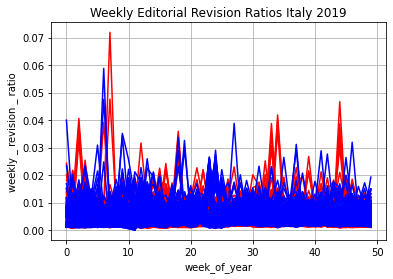

In [68]:
ax = plt.gca()

plt.plot(array_weekly_ratios_italy_2020, color='red') 
plt.plot(array_weekly_ratios_italy_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Italy 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.grid()
plt.show()

# Part three


### Let's instantiate a dictionary to keep the correlations after evey step

In [69]:
earth_correlations={ }
jensen_correlations={ }

## 3.1  earthmover and jensenshanon plots

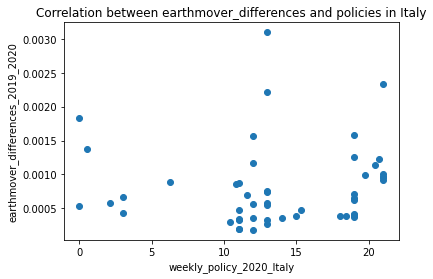

correlation and p_value are:  0.0666979999676513 0.6453652341062857


In [70]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_italy_2019[i] and array_weekly_ratios_italy_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_italy_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_italy_2019[i], array_weekly_ratios_italy_2020[i]))




plt.scatter(weekly_ratio_policy_2020_italy, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)

#save to dictionary

earth_correlations['basic_earthmover']=corr


In [71]:
print(earth_correlations)

{'basic_earthmover': 0.0666979999676513}


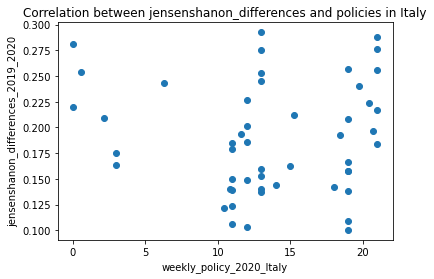

correlation and p_value are:  -0.02865296302662996 0.8434182763498995


In [72]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_italy_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_italy_2019[i], array_weekly_ratios_italy_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_italy, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)

# save to dict

jensen_correlations['basic_jensen']=corr


## Normalize 2020 and 2019 ratios by yearly sum as well


In [73]:

array_weekly_ratios_italy_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_italy_2019_weeklyyearlynorm[i]=array_weekly_events_italy_2019[i]/yearly_sum_2019_italy

    
    
    
array_weekly_ratios_italy_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    array_weekly_ratios_italy_2020_weeklyyearlynorm[i]=array_weekly_events_italy_2020[i]/yearly_sum_2020_italy

print(array_weekly_ratios_italy_2020_weeklyyearlynorm)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.84343437e-05 5.37358695e-05 4.53917904e-05 ... 1.17484634e-04
  1.21489792e-04 1.02298410e-04]
 ...
 [6.42494092e-05 4.57255536e-05 4.05522245e-05 ... 1.33839029e-04
  8.64446596e-05 8.42751991e-05]
 [4.63930799e-05 4.93969484e-05 4.25548035e-05 ... 1.13980121e-04
  9.19517519e-05 8.86141202e-05]
 [5.84085538e-05 3.48782507e-05 2.50322373e-05 ... 1.32837740e-04
  1.14814529e-04 1.01630884e-04]]


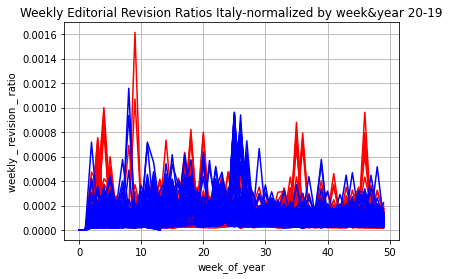

In [74]:
ax = plt.gca()

plt.plot(array_weekly_ratios_italy_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_italy_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Italy-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


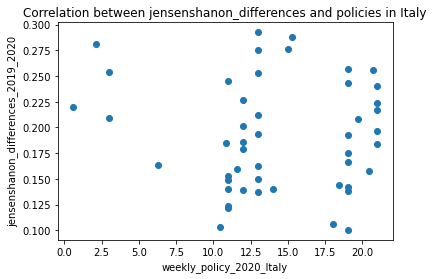

In [75]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_italy_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_italy_2019_weeklyyearlynorm[i], array_weekly_ratios_italy_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_italy, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_italy)
    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['normalizedyearlyweekly_jensen']=corr


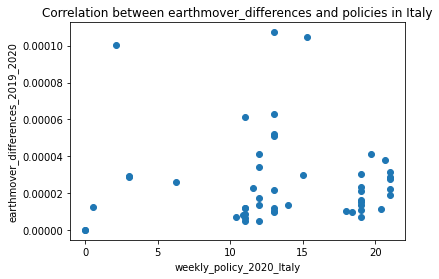

correlation and p_value are:  -0.020018284611244344 0.8902529237827604


In [76]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_italy_2019[i] and array_weekly_ratios_italy_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_italy_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_italy_2019_weeklyyearlynorm[i], array_weekly_ratios_italy_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_italy, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['normalizedyearlyweekly_earth']=corr


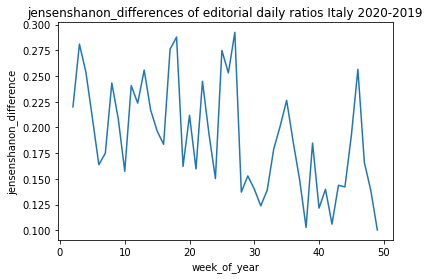

In [77]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Italy 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

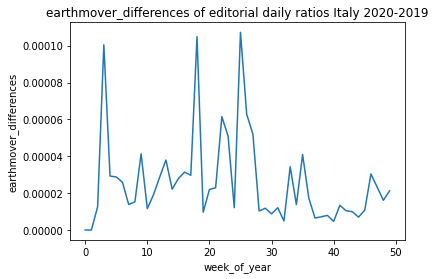

In [78]:
ax = plt.gca()

plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Italy 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()

## let's look at the 168 values from the week 20th

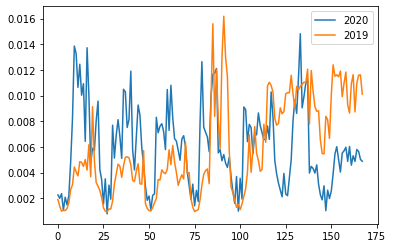

In [79]:
plt.plot(array_weekly_ratios_italy_2020[20], label='2020' )

plt.plot(array_weekly_ratios_italy_2019[20], label='2019' )
plt.legend()

plt.show()

In [80]:
print(earthmover_differences[20])

2.198284207609894e-05


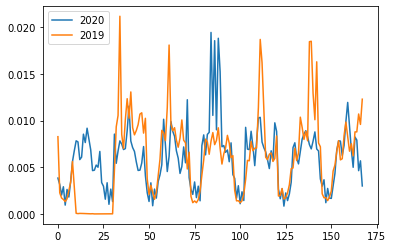

In [81]:
# Week 11 th 

plt.plot(array_weekly_ratios_italy_2020[11], label='2020' )

plt.plot(array_weekly_ratios_italy_2019[11],label='2019' )
plt.legend()

plt.show()

In [82]:
print(array_weekly_ratios_italy_2019[11])

[8.27251141e-03 2.26509241e-03 1.70702616e-03 1.54288903e-03
 1.32403952e-03 1.61948636e-03 2.50582687e-03 3.40310985e-03
 5.61348988e-03 2.79033123e-03 6.56548524e-05 3.28274262e-05
 5.47123770e-05 5.47123770e-05 4.37699016e-05 3.28274262e-05
 1.09424754e-05 0.00000000e+00 1.09424754e-05 2.18849508e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.09424754e-05
 1.09424754e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.09424754e-05 4.59583967e-03
 9.33393152e-03 1.05485463e-02 2.11736899e-02 8.51324587e-03
 7.01412674e-03 1.01108473e-02 1.23431123e-02 1.02421570e-02
 1.30653156e-02 9.23544924e-03 8.46947596e-03 8.92905993e-03
 9.56372351e-03 1.06907985e-02 1.08330507e-02 8.65549805e-03
 1.02421570e-02 3.75326906e-03 2.07907033e-03 3.06389311e-03
 2.29791984e-03 1.56477398e-03 2.27603488e-03 4.11437075e-03
 5.85422434e-03 8.95094488e-03 8.68832547e-03 7.85669734e-03
 1.13801744e-02 1.80879118e-02 9.64032083e-03 8.90717498e-03
 9.23544924e-03 7.911409

## 3.2 Outlier detection & removal  for 2019

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [86]:

# LET'S find the maximum value of the 11th array

print(np.max(array_weekly_ratios_italy_2019[11]))

0.02117368991213192


In [87]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_italy_2019[11] == 0.02117368991213192)

(array([34]),)

In [88]:
#get the exact index
print(np.where(array_weekly_ratios_italy_2019[11] == 0.02117368991213192)[0][0])

34


In [89]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_italy_2019[11][90:94])

[0.00533993 0.00642323 0.00707978 0.00841476]


In [90]:

# see  the average of before and after the max element 
array_weekly_ratios_italy_2019[11][92]=(array_weekly_ratios_italy_2019[11][90]+array_weekly_ratios_italy_2019[11][91])/2


print(array_weekly_ratios_italy_2019[11][90:94])

[0.00533993 0.00642323 0.00588158 0.00841476]


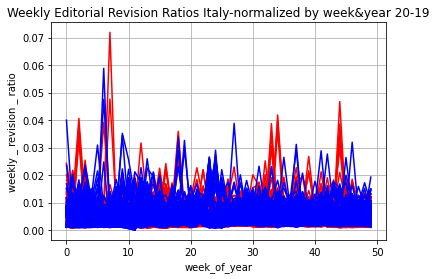

In [91]:
ax = plt.gca()

plt.plot(array_weekly_ratios_italy_2020, color='red') 
plt.plot(array_weekly_ratios_italy_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Italy-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [92]:
array_weekly_ratios_italy_2019.shape

(50, 168)

### remove outliers 10 times from every array in 50 weekly arrays for 2019

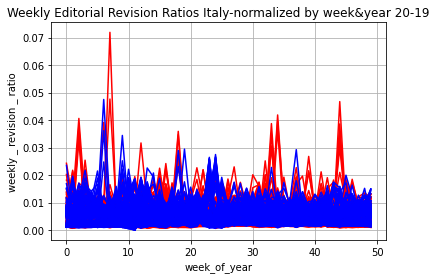

In [93]:
#without_outlier_array_weekly_ratios_italy_2019=np.zeros((50,168))

for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_italy_2019[i])
        getindex=np.where(array_weekly_ratios_italy_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_italy_2019[i][getindex]=(array_weekly_ratios_italy_2019[i][getindex-1]+array_weekly_ratios_italy_2019[i][getindex+1])/2
      
    #plot every 10th loop
    if j%10 ==0:
        ax = plt.gca()
        plt.plot(array_weekly_ratios_italy_2020, color='red') 
        plt.plot(array_weekly_ratios_italy_2019, color='blue') 
        plt.title('Weekly Editorial Revision Ratios Italy-normalized by week&year 20-19')
        plt.ylabel('weekly _ revision _ ratio')
        plt.grid()
        plt.xlabel('week_of_year')
        plt.show()  

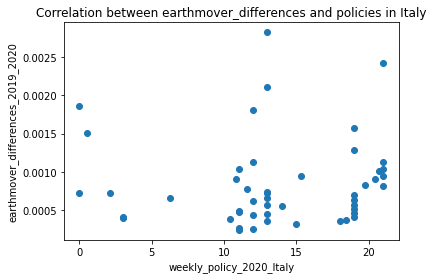

correlation and p_value are:  0.0401144090507999 0.7820959745273798


In [94]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_italy_2019[i] and array_weekly_ratios_italy_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_italy_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_italy_2019[i], array_weekly_ratios_italy_2020[i]))




plt.scatter(weekly_ratio_policy_2020_italy, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['without_outlier10_earth']=corr



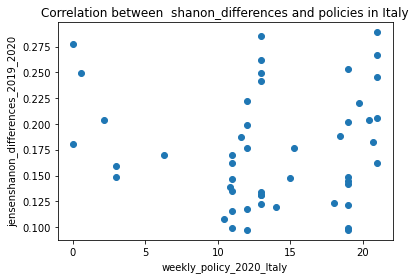

correlation and p_value are:  0.000381084855267437 0.9979043434962539


In [95]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_italy_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_italy_2019[i], array_weekly_ratios_italy_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_italy, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['without_outlier10_jensen']=corr




In [96]:
print(jensenshanon_differences)

[0.1808261097941552, 0.2772401609427518, 0.24985875082590603, 0.20409573285898283, 0.15915135561660448, 0.149007935333325, 0.1702158210386272, 0.20161058155873454, 0.14815887269705982, 0.2199293140742595, 0.20424267187719847, 0.24530017616825803, 0.20609942236005377, 0.18203467592289294, 0.1617419376880972, 0.2669276807455221, 0.2888649811748354, 0.14745771580579836, 0.1764243734465411, 0.1315653886944288, 0.24200628369199478, 0.18726872125304814, 0.14648095952850643, 0.26216986647187307, 0.24896788042717097, 0.2855727229067633, 0.13411160349328352, 0.12229786851880584, 0.13121445151317382, 0.115671374763927, 0.1351990171812988, 0.1698933282159657, 0.19922072863265966, 0.22248032137723492, 0.17690407107969508, 0.11775073652071252, 0.09714425794640094, 0.16220513888668436, 0.10773038458723153, 0.13839152155479245, 0.09861126421490816, 0.11962648544196093, 0.1234119366063604, 0.18871853139208009, 0.2532051420969306, 0.14139612910520635, 0.12117084441866767, 0.09903194598514119, 0.0973255

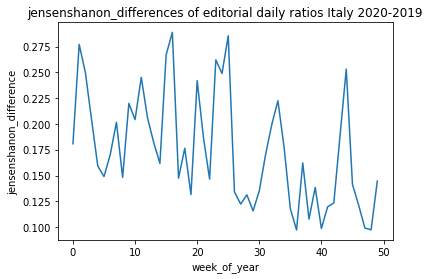

In [97]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Italy 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

In [98]:
print(len(array_weekly_events_italy_2019[2:]))

50


### Let's remove the outliers from yearly_weekly_normalized data and find the correaltion again

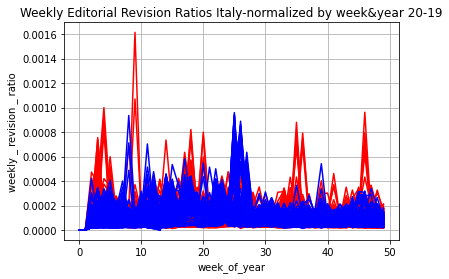

In [99]:
#without_outlier_array_weekly_ratios_italy_2019=np.zeros((50,168))



for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_italy_2019_weeklyyearlynorm[i])
        getindex=np.where(array_weekly_ratios_italy_2019_weeklyyearlynorm[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_italy_2019_weeklyyearlynorm[i][getindex]=(array_weekly_ratios_italy_2019_weeklyyearlynorm[i][getindex-1]+array_weekly_ratios_italy_2019_weeklyyearlynorm[i][getindex+1])/2
      
    #plot every 10th loop
    if j%10 ==0:
        ax = plt.gca()
        plt.plot(array_weekly_ratios_italy_2020_weeklyyearlynorm, color='red')
        plt.plot(array_weekly_ratios_italy_2019_weeklyyearlynorm, color='blue') 
        plt.title('Weekly Editorial Revision Ratios Italy-normalized by week&year 20-19')
        plt.ylabel('weekly _ revision _ ratio')
        plt.grid()
        plt.xlabel('week_of_year')
        plt.show()  

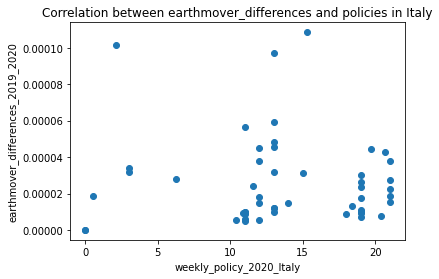

correlation and p_value are:  -0.04921238235573221 0.7343172123093912


In [100]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_italy_2019[i] and array_weekly_ratios_italy_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_italy_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_italy_2019_weeklyyearlynorm[i], array_weekly_ratios_italy_2020_weeklyyearlynorm[i]))


plt.scatter(weekly_ratio_policy_2020_italy, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['normalizedyearlyweekly_without_outlier10_earth']=corr



/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


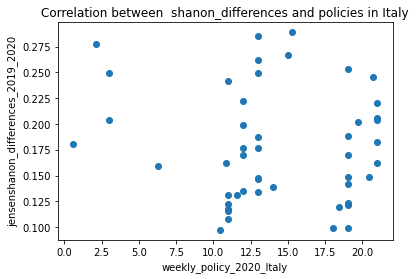

In [101]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_italy_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_italy_2019_weeklyyearlynorm[i], array_weekly_ratios_italy_2020_weeklyyearlynorm[i]))
    
plt.scatter(weekly_ratio_policy_2020_italy, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_italy)
    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']=corr



## 3.3 Moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

In [102]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_italy_2019_50=array_weekly_events_italy_2019[2:]

moving_average_weekly_ratios_italy_2019=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_italy_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_italy_2019_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_italy_2019[i]= np.asarray(moving_averages)

        

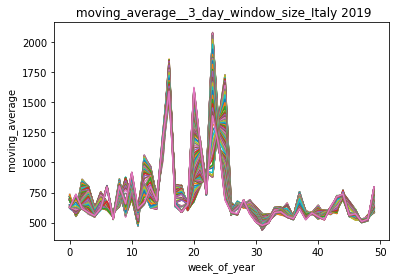

In [103]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_italy_2019) 
plt.title(' moving_average__3_day_window_size_Italy 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

In [104]:

array_weekly_events_italy_2020_50=array_weekly_events_italy_2020[2:]

moving_average_weekly_ratios_italy_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_italy_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_italy_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_italy_2020[i]= np.asarray(moving_averages)

        

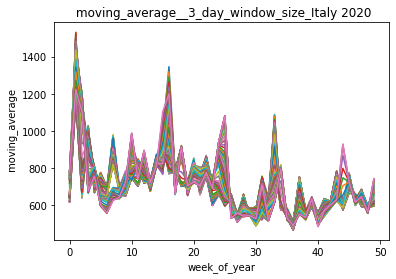

In [105]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_italy_2020) 
plt.title(' moving_average__3_day_window_size_Italy 2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

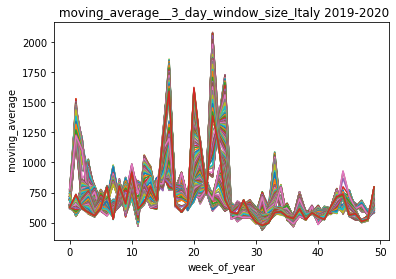

In [106]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_italy_2020) 
plt.plot( moving_average_weekly_ratios_italy_2019) 

plt.title(' moving_average__3_day_window_size_Italy 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')

plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


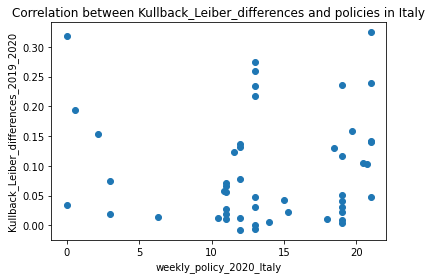

correlation and p_value are:  0.016154252421169635 0.9113420886805104


In [107]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_italy_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_italy_2019[i], array_weekly_ratios_italy_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_italy, kl_differences) 
plt.title('Correlation between Kullback_Leiber_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_italy)
print("correlation and p_value are: ", corr, p_value)




## 3.5 Feature importance - feature selection - dimensionality reduction
Which policy indicators have the highest correlation with the editorial data?
Let's first look at correlations

In [108]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_italy_indicators_ratio
edit_and_policy['jensenshanon_differences']=jensenshanon_differences
edit_and_policy['earthmover_differences']=earthmover_differences


edit_and_policy.head(10)


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
week_of_year,,,,,,,,,,,
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.571429,0.180826,0.000018
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.142857,2.142857,0.277240,0.000102
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.249859,0.000034
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.204096,0.000032
8,0.428571,0.857143,0.285714,0.571429,0.000000,0.285714,0.857143,3.000000,6.285714,0.159151,0.000028
9,3.000000,3.000000,2.000000,4.000000,0.000000,2.000000,2.000000,3.000000,19.000000,0.149008,0.000010
10,3.000000,3.000000,2.000000,4.000000,0.000000,2.000000,2.000000,3.000000,19.000000,0.170216,0.000009


## 3.5.1  Correlation Heatmap

In [109]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
weekly_school,1.000000,0.622418,0.845180,0.419976,0.175635,0.404218,0.282570,0.534826,0.682647,0.052857,0.101812
weekly_workplace,0.622418,1.000000,0.783375,0.761797,0.627844,0.776791,0.640918,0.600025,0.931300,-0.190211,-0.126812
weekly_events,0.845180,0.783375,1.000000,0.625011,0.262199,0.427932,0.340321,0.655014,0.788865,-0.241719,-0.071649
weekly_gatherings,0.419976,0.761797,0.625011,1.000000,0.661632,0.719636,0.685211,0.368595,0.873556,-0.108012,-0.091711
weekly_transportation,0.175635,0.627844,0.262199,0.661632,1.000000,0.749266,0.704493,0.211661,0.701047,-0.078312,-0.103382
weekly_home,0.404218,0.776791,0.427932,0.719636,0.749266,1.000000,0.855103,0.296914,0.851144,0.050207,0.002795
weekly_movement,0.282570,0.640918,0.340321,0.685211,0.704493,0.855103,1.000000,0.191732,0.771400,-0.022991,-0.048840
weekly_travel,0.534826,0.600025,0.655014,0.368595,0.211661,0.296914,0.191732,1.000000,0.586149,-0.277217,0.029509
weekly_sum,0.682647,0.931300,0.788865,0.873556,0.701047,0.851144,0.771400,0.586149,1.000000,-0.105412,-0.049212
jensenshanon_differences,0.052857,-0.190211,-0.241719,-0.108012,-0.078312,0.050207,-0.022991,-0.277217,-0.105412,1.000000,0.753109


In [110]:
df_final=weekly_policy_2020_italy_indicators_ratio.iloc[:,:8]
df_final.head()

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
week_of_year,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.142857
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


In [111]:

#1
df2_meaned=df_final.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
weekly_school,1.134536,0.642066,0.619142,0.689055,0.111995,0.412370,0.294611,0.399392
weekly_workplace,0.642066,0.937943,0.521783,1.136443,0.364015,0.720533,0.607580,0.407414
weekly_events,0.619142,0.521783,0.473003,0.662124,0.107955,0.281883,0.229105,0.315835
weekly_gatherings,0.689055,1.136443,0.662124,2.372686,0.610121,1.061683,1.033136,0.398059
weekly_transportation,0.111995,0.364015,0.107955,0.610121,0.358392,0.429613,0.412828,0.088838
weekly_home,0.412370,0.720533,0.281883,1.061683,0.429613,0.917326,0.801666,0.199375
weekly_movement,0.294611,0.607580,0.229105,1.033136,0.412828,0.801666,0.958134,0.131579
weekly_travel,0.399392,0.407414,0.315835,0.398059,0.088838,0.199375,0.131579,0.491537


In [112]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
eig_vectors

array([[ 0.29337488,  0.68086552, -0.23911843, -0.49192954, -0.25885202,
        -0.0142421 ,  0.28968992, -0.00731948],
       [ 0.3913692 ,  0.14105182, -0.11912517,  0.37538057, -0.39112167,
         0.47242387, -0.5102646 ,  0.1878902 ],
       [ 0.22812286,  0.36522496,  0.10452194, -0.01757213,  0.80630217,
        -0.01823812, -0.3073045 ,  0.24175443],
       [ 0.63024324, -0.23131593,  0.6918673 , -0.17592943, -0.09996948,
        -0.08347111,  0.0811059 , -0.1269464 ],
       [ 0.18917791, -0.21571102, -0.11344433,  0.15445347,  0.14403669,
         0.34383012,  0.64410631,  0.57194084],
       [ 0.36453608, -0.22653654, -0.45826471,  0.03293675,  0.30458093,
         0.25599579,  0.10901546, -0.65917791],
       [ 0.34270525, -0.35355676, -0.4640826 , -0.13514679, -0.07175527,
        -0.60728645, -0.21448061,  0.32243734],
       [ 0.15935191,  0.32676869,  0.02788453,  0.73663386, -0.03517755,
        -0.4655781 ,  0.28624523, -0.15647823]])

In [113]:
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [114]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


         PC1       PC2
0  -4.578390 -2.147053
1  -4.578390 -2.147053
2  -4.487332 -1.960328
3  -4.236922 -1.446835
4  -4.100335 -1.166747
5  -4.100335 -1.166747
6  -2.815926 -1.149650
7   2.345599 -0.055996
8   2.345599 -0.055996
9   2.480726 -0.210075
10  2.691007 -0.368794
11  2.899313 -0.498243
12  2.899313 -0.498243
13  2.770109 -0.431972
14  2.723955 -0.487418
15  2.723955 -0.487418
16  2.723955 -0.487418
17  1.038973 -0.438331
18  1.150792 -0.398031
19 -0.931279  0.954753
20 -0.931279  0.954753
21 -1.420858  1.459834
22 -1.616690  1.661866
23 -0.356203  1.199234
24 -0.356203  1.199234
25 -0.356203  1.199234
26 -0.356203  1.199234
27 -0.356203  1.199234
28 -0.356203  1.199234
29 -1.112109  1.284719
30 -1.112109  1.284719
31 -1.112109  1.284719
32 -0.720739  1.425771
33 -0.720739  1.425771
34 -0.720739  1.425771
35 -0.720739  1.425771
36 -0.720739  1.425771
37 -1.014114  0.744905
38 -1.181757  0.355839
39 -0.767281 -0.134231
40 -0.677246 -0.167276
41  0.405874 -0.564282
42  1.85003

In [115]:
principal_df2_two_dim.var()

PC1    5.098462
PC2    1.231579
dtype: float64

In [116]:
PC1=list(principal_df2_two_dim.iloc[:,0])

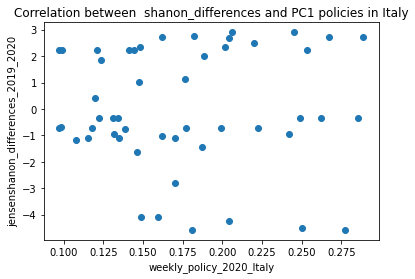

correlation and p_value are:  -6.249552950463727e-05 0.9996563250862643


In [117]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_italy_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_italy_2019[i], array_weekly_ratios_italy_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['PC1_basic_jensen']=corr





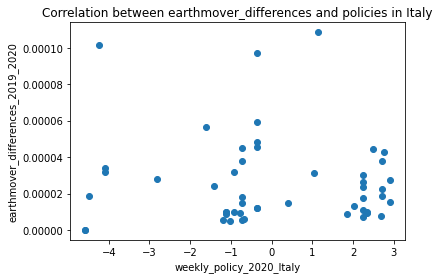

correlation and p_value are:  -0.062154481345872925 0.6680706794648918


In [118]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_italy_2019[i] and array_weekly_ratios_italy_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_italy_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_italy_2019_weeklyyearlynorm[i], array_weekly_ratios_italy_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Italy')
plt.xlabel('weekly_policy_2020_Italy')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



### 4. Results

In [119]:

for key, value in earth_correlations.items():
    print(key, ' : ', value)


basic_earthmover  :  0.0666979999676513
normalizedyearlyweekly_earth  :  -0.020018284611244344
without_outlier10_earth  :  0.0401144090507999
normalizedyearlyweekly_without_outlier10_earth  :  -0.04921238235573221
PC1_basic_earth  :  -0.062154481345872925


In [120]:

for key, value in jensen_correlations.items():
    print(key, ' : ', value)

basic_jensen  :  -0.02865296302662996
normalizedyearlyweekly_jensen  :  nan
without_outlier10_jensen  :  0.000381084855267437
normalizedyearlyweekly_without_outlier10_jensen  :  nan
PC1_basic_jensen  :  -6.249552950463727e-05
